# ******** IMAGE CAPTIONING WITH VISUAL ATTENTION ********

IMPORTING IMPORTANT LIBRARIES

In [1]:
import tensorflow as tf
# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt
# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle  # to shuffle the data
import numpy as np #For handling matrix
import os     #for file handling
import time   #For determining how much time it took to train the model
from PIL import Image as IG  #for opening image as matrix
from pickle import load ,dump  #to save the data in pkl format
from IPython.display import Image,display  # to display the images
from tqdm import tqdm   # to know the progress 
import string

In [2]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# To remove punctuations
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(string.punctuation)
    return(text_no_punctuation)


# To remove single characters
def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

# To remove numeric values
def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))#its printing word and true or false if its alpha or not and we r sending printTF as False so that it should not print
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)

In [5]:
data=load_doc("captions.txt")  #loading the data

In [3]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_numeric(text)
    return(text)

In [7]:
#storing all image_ids and their respective captions in a dictionary for simplifications

Descriptions=dict()  #Dictionary which contains image id as key and value as list of captions
i=0
for line in data.split("\n"):
    #skipping the first line bcoz it contains the heading(attribute name)
    if i==0:
        i=1
        continue
    tokens = line.split(',')
    image_id , image_desc = tokens[0],tokens[1:]
    

    # dropping .jpg from image id
    image_id = image_id.split(".")[0]

    image_desc = " ".join(image_desc)
    image_desc=text_clean(image_desc);
    image_desc ='<start> ' + image_desc + ' <end>' 
        # check if image_id is already present or not
    if image_id in Descriptions:
        Descriptions[image_id].append(image_desc)
    else:
        Descriptions[image_id] = list()
        Descriptions[image_id].append(image_desc)

In [8]:
#stores image_paths and their captions in two lists parallely
all_captions = []
all_img_name_vector = []

for ID,Desc in Descriptions.items():
    full_image_path = './Images/{}.jpg'.format(ID)
    for cap in Desc:
        all_img_name_vector.append(full_image_path)
        all_captions.append(cap)
#shuffle the data
train_captions, img_name_vector = shuffle(all_captions,all_img_name_vector,random_state=1)

In [9]:
def image_desc_plotter(data):
    no_of_pics=5
    target_size=(224,224,3)
    for i in range(no_of_pics):
        
        image_no=np.random.randint(0,len(data))
        ID=list(Descriptions.keys())[image_no]
        full_image_path = './Images/{}.jpg'.format(ID)
        image_load = tf.keras.preprocessing.image.load_img(full_image_path, target_size=target_size)
        plt.imshow(image_load)
        plt.show()
        for cap in Descriptions[ID]:
            print(cap)
        

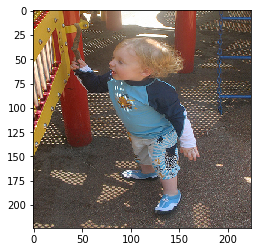

<start>  A child plays with a toy on a playground <end>
<start>  A small child is wearing a blue outfit with blue shoes <end>
<start>  A toddler plays on a playground <end>
<start>  A young child is playing with a stick at a playground <end>
<start>  There is a toddler playing on a playground <end>


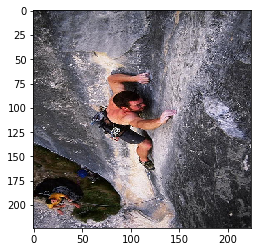

<start>  a man climbs a mountain <end>
<start>  A man climbs the side of a mountain <end>
<start>  A shirtless man climbs a wall in nature <end>
<start>  man is climbing a rock wall while another man below holds a rope <end>
<start>  two men climbing a mountain <end>


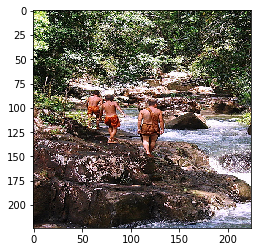

<start>  Three boys walk on rocks along a river <end>
<start>  Three males walk on rocks by a stream <end>
<start>  three men in brown shorts are walking on rocks beside a river <end>
<start>  three people walking on rocks near a stream <end>
<start>  Three people walk on the rocks near the water <end>


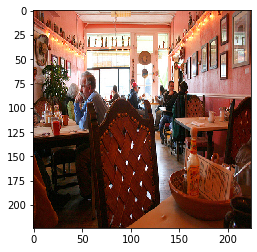

<start>  An empty seat at a Mexican themed restaurant <end>
<start>  A red colored diner features dark red chairs <end>
<start>  Mexican restaurant empty chair in foreground <end>
<start>  Many people sit in a Mexican restaurant <end>
<start>  People are sitting in a cheery Mexican restaurant <end>


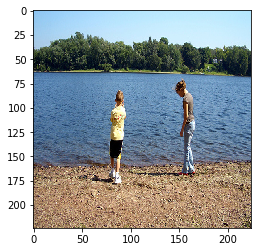

<start>  A boy and a girl are standing on a river bank facing the water <end>
<start>  A boy and a slightly older girl stand on the shore of a small blue lake <end>
<start>  A young woman and a young boy stand on the shore of a river <end>
<start>  people a boy in yellow and girl in brown standing at the shore of a lake <end>
<start>  Two people stand by the water edge <end>


In [10]:
image_desc_plotter(Descriptions)

In [11]:
#creating vocabulary and then sorting on the basis of its freq
from collections import OrderedDict 
Wordfreq=dict()
for cap in all_captions:
    caption = cap.split()[1:-1] # to not count "<start>" and "<end>"
    for word in caption:
        if word in Wordfreq:
            Wordfreq[word]+=1
        else:
            Wordfreq[word]=1
            
Wordfreq=OrderedDict(sorted(Wordfreq.items(), key=lambda x: x[1], reverse=True))#this returns a dict in Descending order of values


In [12]:
print("Total number of unique words :{}".format(len(Wordfreq)))

Total number of unique words :9024


In [14]:
def plthist(words,freq, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(30,3))
    plt.bar(range(50),freq,color ='g')
    plt.yticks(fontsize=20,color ='black')
    plt.xticks(range(50),words,rotation=90,fontsize=20,color ='black')
    plt.title(title,fontsize=20)
    plt.show()

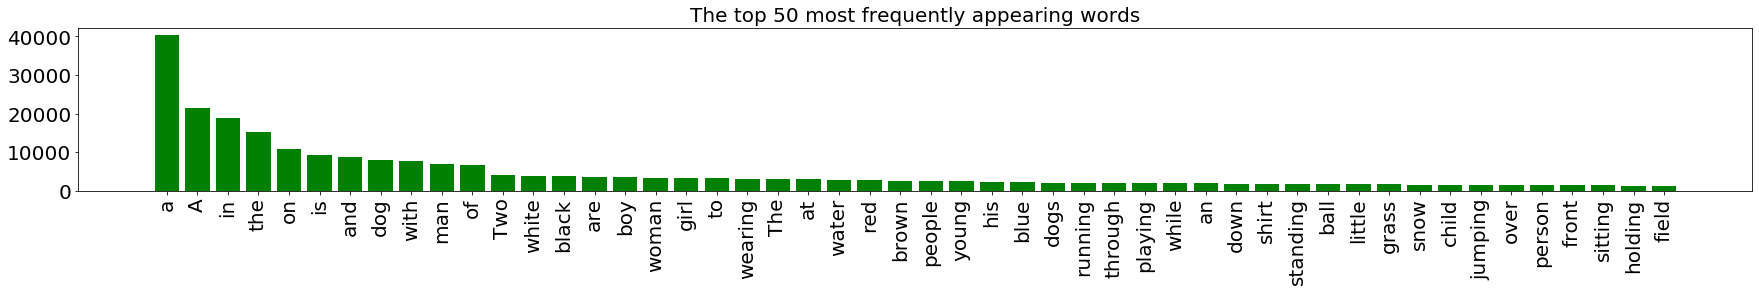

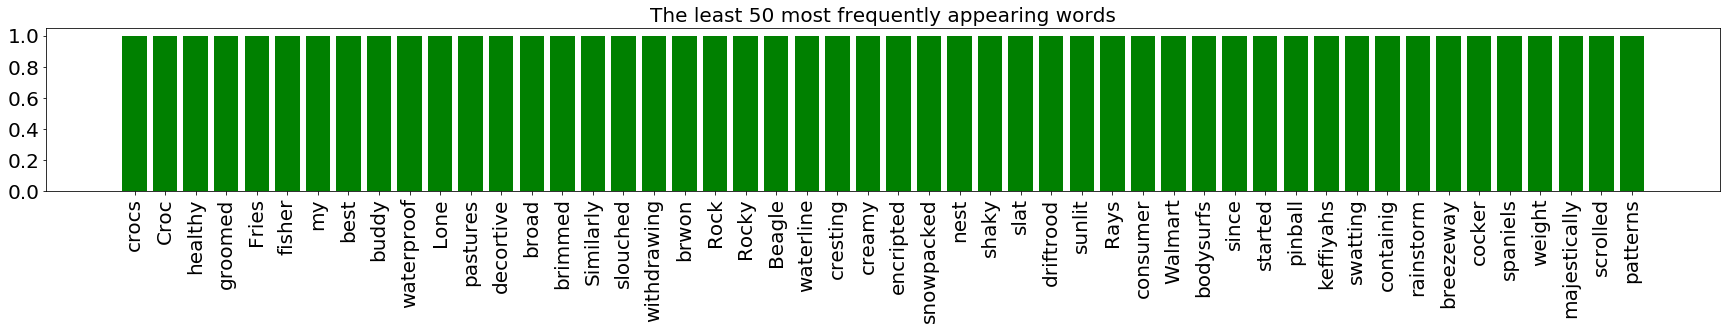

In [15]:
words = list(Wordfreq.keys())  #creating list of words
freq = list(Wordfreq.values()) #creating list of values

plthist(words[0:50],freq[0:50],title="The top 50 most frequently appearing words")
plthist(words[-50:],freq[-50:],title="The least 50 most frequently appearing words")


In [16]:
# save to file
dump(train_captions, open('captions.pkl', 'wb'))
dump(img_name_vector, open('img_names.pkl', 'wb'))

In [21]:
#for the purpose of loading,if we don't want to get it through disk
train_captions = load(open('captions.pkl', 'rb'))
img_name_vector = load(open('img_names.pkl', 'rb'))

In [17]:
#Preprocessing for inceptionV3 model
def load_image(image_path):
    img = tf.io.read_file(image_path)   #reads the file mentioned in the path
    img = tf.image.decode_jpeg(img, channels=3)  #convert the compressed string to a 3D uint8 tensor
    img = tf.image.resize(img, (299, 299))  #resizes image to desired size
    img = tf.keras.applications.inception_v3.preprocess_input(img) #preprocess the image to make it suitable as input for inception model(normalized btw -1 & 1)
    return img, image_path

In [18]:
#initialize our model weights to imagenet model weights(1.5 million images and 1000 classes) 
#not including the classification layer 
image_model = tf.keras.applications.InceptionV3(include_top=False)
new_input = image_model.input   # input layer
hidden_layer = image_model.layers[-1].output  # hidden layers

#creates a model with input layer=>new_input and output layers=>hidden_layer
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [8]:
#Saving feautures of Images for future use

encode_train = sorted(set(img_name_vector))  #gets unique list of images
encode_train=encode_train[1:]                #since first element is null

#we can get the slices of an array in the form of tensors =>input is list
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)

#mapping preprocessed image to image path using map_func(load_image)
#tf.data.experimental.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)  #extracts the features from the model(16x8x8x2048)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))  #(16x64x2048)
    #saving into cache
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")  #converting the path in utf-8 format
        np.save(path_of_feature, bf.numpy())   #saving the batch_features in path_of_features

506it [23:54,  2.83s/it]


In [19]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [21]:
# Choose the top 5000 words from the vocabulary 
top_k = 5000

#limit the vocabulary size to the top 5,000 words (to save memory) and replace all other words with the token "UNK" (unknown).
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,oov_token="<unk>",filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

#Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(train_captions)

#Transforms each text in train_captions to a sequence of integers.
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [22]:
#pad all sequences to be the same length as the longest one.
tokenizer.word_index['<pad>'] = 0  #just making the index of word "<pad>" to 0
tokenizer.index_word[0] = '<pad>'# making 0 index to "<pad>"

In [23]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [24]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [25]:
cap_vector

array([[   3,  187,   63, ...,    0,    0,    0],
       [   3,    2,   12, ...,    0,    0,    0],
       [   3,    2,   15, ...,    0,    0,    0],
       ...,
       [   3,    2,   10, ...,    0,    0,    0],
       [   3,    2,   10, ...,    0,    0,    0],
       [   3,    2, 3210, ...,    0,    0,    0]])

In [26]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

In [27]:
# Create training and validation sets using an 80-20 split
img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector,cap_vector,test_size=0.2,random_state=0)
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(32364, 32364, 8091, 8091)

In [28]:
# Feel free to change these parameters according to your system's configuration
BATCH_SIZE = 64  # this is batch size which we r going to send in the model
BUFFER_SIZE = 1000 
embedding_dim = 256 # we r getting output from inceptionV3 model of dimension 64*2048..that we will convert into 64*embedding_dim
units = 512 #number of unit in the rnn model
vocab_size = top_k + 1 # this u know 1 added bcoz of <unk>
num_steps = len(img_name_train) // BATCH_SIZE #this is also self explanatory
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048 #features shape ..remember we r getting output of 8*8*2048
attention_features_shape = 64 #this is 8x8

In [29]:
# Load the numpy files so i shouldn't load?
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap
#so basically we are decoding the path and storing feauture vector at that place and now we are retriving it back


In [30]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
#mapping the dataset to map_func and converting to tensor
dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)#creates a dataset that pefetches element from this dataset
#what is prefetch? why?
#This allows later elements to be prepared while the current element is processed.This often improves latency and 
#throughput,at the cost of using additional memory to store prefetched elements

In [31]:
#okay so this attention model that was prepared after reasearch and was published
#yes,bcz we can't remember whole sentence..so we pay attention to some part and decode it and the next part like that..yeah
#so after passing through attention model we get context vector and attention weights that we use in rnn model(decoder) as input
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__() #calling / initializing  its super class
        self.W1 = tf.keras.layers.Dense(units)    #making layer object which gives output of dimension (batch_size,units)
        self.W2 = tf.keras.layers.Dense(units)    
        self.V = tf.keras.layers.Dense(1)   

    def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim) so this one is features of image

    # hidden shape == (batch_size, hidden_size)  ...this one is previous hidden state
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1) # expanding dim

    # score shape == (batch_size, 64, hidden_size) (this is eij)
        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))#  concatenate previous hidden state and features
    # attention_weights shape == (batch_size, 64, 1)
    # you get 1 at the last axis because you are applying score to self.V
        attention_weights = tf.nn.softmax(self.V(score), axis=1) #this is alpha

    # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features         #(batch_size,64,hidden_size)
        context_vector = tf.reduce_sum(context_vector, axis=1) #this is final context vector

        return context_vector, attention_weights

In [32]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it using pickle
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x
    

In [33]:

class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim) #converts it into dense vector of size (vocab_size,input_length,embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)  #output and hidden state

        # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)

        # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))

        # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)

        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [34]:
encoder = CNN_Encoder(embedding_dim) #embedding_dim is dimension of output on cnn_encoder?
decoder = RNN_Decoder(embedding_dim, units, vocab_size) 
#creates decoder..two input i.e. one is hidden state(batch_sizexunits),features(batch_sizex64xembedding_dim)
#two output i.e. one is next hidden state(batch_sizexunits),predicted word(batch_sizexunits)

In [35]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')  #object model for cross entropy loss=> returns logit tensor

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))#it will return tensor with true false value,we r doing this bcoz we put zero value as padding na so we don't need to claculate those as error
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [36]:
#here we r creating checkpoints.
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [37]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1]) # here we r taking the last checkpoint
    # restoring the latest checkpoint in checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint) # here restoring the checkpoint

In [38]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

In [39]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    #target is real caption.
    # initializing the hidden state for each batch
    # because the captions are not related from image to image
    hidden = decoder.reset_state(batch_size=target.shape[0])
    #target is in shape((batch_size x caption length)) how this target is of that shape u r asking? we r loading the dtaset in batches ryt thats so we are sending all the batch 's captions?oh
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)#remember that start tokaen vector..that we r taking over here and converting into batch size so that it can feed to whole batch and extending dim so that it fit to the model input..okay?
    #nothing..trying to understand the next part.oky..tell me when u r done
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)  

        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden) 

            loss += loss_function(target[:, i], predictions) 

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

In [29]:
EPOCHS = 12 

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if (epoch ==6 or epoch==11):
        ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 4 Batch 0 Loss 0.5645
Epoch 4 Batch 100 Loss 0.5473
Epoch 4 Batch 200 Loss 0.5506
Epoch 4 Batch 300 Loss 0.5723
Epoch 4 Batch 400 Loss 0.5598
Epoch 4 Batch 500 Loss 0.5972
Epoch 4 Loss 0.570008
Time taken for 1 epoch 2162.8991446495056 sec

Epoch 5 Batch 0 Loss 0.5716
Epoch 5 Batch 100 Loss 0.5658
Epoch 5 Batch 200 Loss 0.4998
Epoch 5 Batch 300 Loss 0.5669
Epoch 5 Batch 400 Loss 0.4488
Epoch 5 Batch 500 Loss 0.5171
Epoch 5 Loss 0.542606
Time taken for 1 epoch 2054.222502708435 sec

Epoch 6 Batch 0 Loss 0.5034
Epoch 6 Batch 100 Loss 0.5512
Epoch 6 Batch 200 Loss 0.5312
Epoch 6 Batch 300 Loss 0.5661
Epoch 6 Batch 400 Loss 0.5276
Epoch 6 Batch 500 Loss 0.5005
Epoch 6 Loss 0.515130
Time taken for 1 epoch 2038.8190343379974 sec

Epoch 7 Batch 0 Loss 0.5530
Epoch 7 Batch 100 Loss 0.4952
Epoch 7 Batch 200 Loss 0.4705
Epoch 7 Batch 300 Loss 0.4956
Epoch 7 Batch 400 Loss 0.4711
Epoch 7 Batch 500 Loss 0.4609
Epoch 7 Loss 0.489973
Time taken for 1 epoch 2045.1643378734589 sec

Epoch 8 Batch

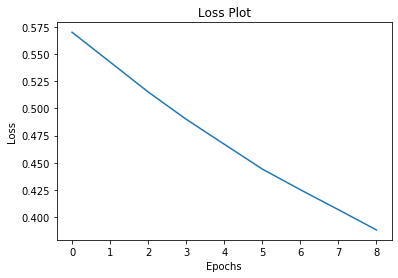

In [30]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [40]:
def evaluate_standard(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    #creating image tensor(by extracting features) so that we can send it as input into encoder
    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        predicted_id = tf.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])
        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [41]:
def evaluate_greedy(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    #creating image tensor(by extracting features) so that we can send it as input into encoder
    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
    
        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [42]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(IG.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

real Caption: <start> a large skinny dog is trying to catch a faded green tennis ball <end>
Prediction Caption1: a brown dog with mouth surfer backyard in its mouth <end>


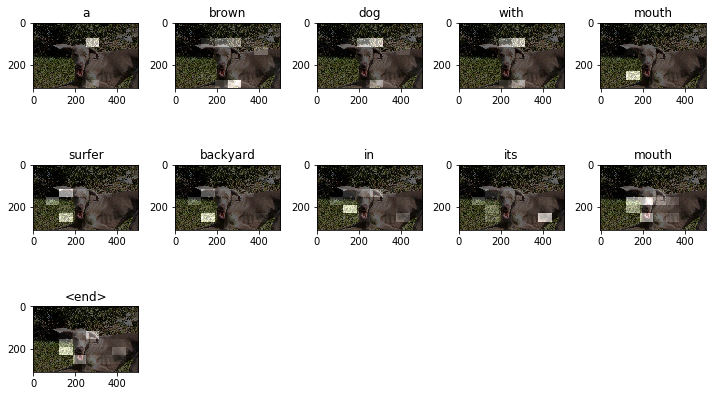

Prediction Caption2: a brown dog spray for a ball in its mouth <end>


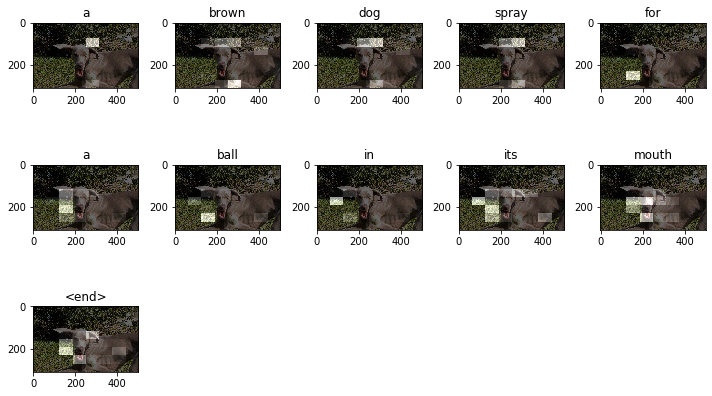

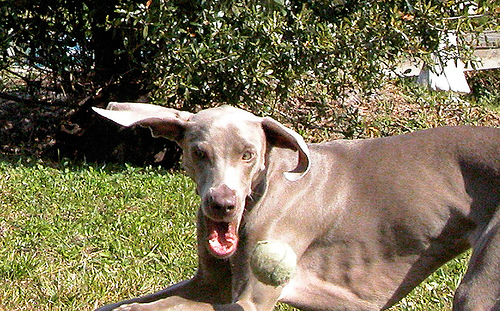

In [43]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result1, attention_plot1 = evaluate_standard(image)
result2, attention_plot2 = evaluate_greedy(image)

print ('real Caption:', real_caption)
print ('Prediction Caption1:', ' '.join(result1))
plot_attention(image,result1,attention_plot1)
print ('Prediction Caption2:', ' '.join(result2))
plot_attention(image,result2,attention_plot2)

IG.open(image)

In [ ]:
#Try for your own input
image = './us1.jpg'

result1, attention_plot1 = evaluate_standard(image)
result2, attention_plot2 = evaluate_greedy(image)
print ('Prediction Caption1:', ' '.join(result1))
plot_attention(image, result1, attention_plot1)

print ('Prediction Caption2:', ' '.join(result2))
plot_attention(image, result2, attention_plot2)
# opening the image
IG.open(image)
